In [87]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.optimize as sp
import math

In [88]:
mechpowerdf = pd.read_csv('../Data/mechpower.csv')
elecpowerdf = pd.read_csv('../Data/elecpower.csv')
coolingdf = pd.read_csv('../Data/cooling.csv')

In [89]:
#Theoretical Model

def curve(x,a,b,c):
    return a*x**2 + b*x + c
def curve2(t,T_0,T_h,T_c,k):
    return T_0 + (T_h - T_c)*np.exp(-k*t)

In [ ]:
df1 = pd.read_csv('../Data/mechpowertable.csv')

#Error for Mech Power
t1std = np.std(df1['T1'])
t2std = np.std(df1['T2'])

t1mean = np.mean(df1['T1'])
t2mean = np.mean(df1['T2'])

t1err = t1std/t1mean 
t2err = t2std/t2mean

print(t1err,t2err)

xerr1 = np.sqrt(t1err**2+t2err**2)
print(xerr1)

yerr1 = np.mean([0.5/x for x in df1['Torque Meter'] if x > 0])
print(yerr1)

0.14749847912971367 0.05358273271379577
0.15692963579469832
0.05212452172821465


In [ ]:
df2s = pd.read_csv('../Data/elecpowertable.csv',dtype={"column_name": str})
df2 = pd.read_csv('../Data/elecpowertable.csv')

#Error for Elec Power
t1std = np.std(df2['T1'])
t2std = np.std(df2['T2'])

t1mean = np.mean(df2['T1'])
t2mean = np.mean(df2['T2'])

t1err = t1std/t1mean 
t2err = t2std/t2mean

print(t1err,t2err)

xerr2 = np.sqrt(t1err**2+t2err**2)
print(xerr2)

def digit(V):
    if V == 0 or not isinstance(V,(int,float)) or math.isnan(V):
        return 0
    number = '0.'
    for i in range(1,len(str(V))-2):
        number += '0'
        i += 1
    return float(number + str(abs(V))[-1])

verrlst = [0.009 * V + 2*digit(V) if isinstance(V,(int,float)) and not math.isnan(V) else None for V in df2s['Voltage (V)']]
aerrlst = [0.018 * A + 2*digit(A) if isinstance(A,(int,float)) and not math.isnan(A) else None for A in df2s['Current (A)']]

def average(lst):
    clean_lst = [x for x in lst if x is not None]
    return sum(clean_lst)/len(clean_lst) if clean_lst else None

verr = average(verrlst)
aerr = average(aerrlst)

yerr2 = np.sqrt(verr**2+aerr**2+0.01**2)
print(yerr2)

0.07909883531631907 0.04180086514554547
0.08946473090170362
0.08725517119670832


In [92]:
df = pd.read_csv('../Data/mechpowertable.csv')

t1std = np.std(df['T1'])
t2std = np.std(df['T2'])

t1mean = np.mean(df['T1'])
t2mean = np.mean(df['T2'])

t1err = t1std/t1mean 
t2err = t2std/t2mean

print(t1err,t2err)

xerr1 = np.sqrt(t1err**2+t2err**2)
print(xerr1)

yerr1 = np.mean([0.5/x for x in df['Torque Meter'] if x > 0])
print(yerr1)

0.14749847912971367 0.05358273271379577
0.15692963579469832
0.05212452172821465


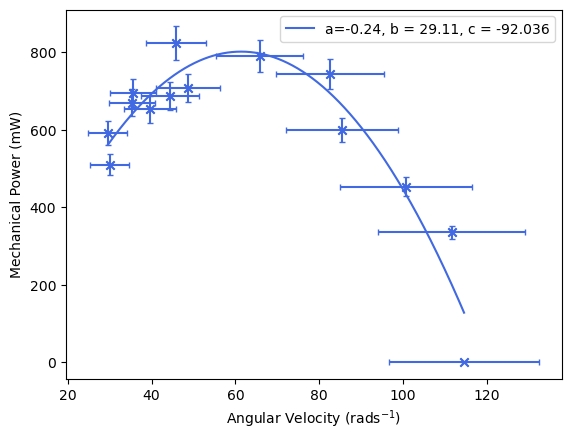

In [93]:
#Mechanical Power vs Angular Velocity plot

x = mechpowerdf['Angular Velocity'] 
y = mechpowerdf['Power']

param,covariance = sp.curve_fit(curve,x,y)
x_smooth = np.linspace(x.min(),x.max(),1000)
y_smooth = curve(x_smooth,*param)
plt.plot(
    x_smooth,
    y_smooth,
    label=rf'a={param[0]:.2f}, b = {param[1]:.2f}, c = {param[2]:.3f}',
    color='royalblue'
)

plt.scatter(
    x,
    y,
    color='royalblue',
    marker='x'
)

plt.errorbar(
    x,
    y,
    xerr=xerr1*x,
    yerr=yerr1*y,
    fmt='x',
    color='royalblue',
    ecolor='royalblue',
    capsize=2.0
)

plt.xlabel(r'Angular Velocity (rads$^{-1}$)')
plt.ylabel(r'Mechanical Power (mW)')

plt.legend()

plt.savefig("../Figures/mechpower.pgf",bbox_inches='tight',pad_inches=0.1)
plt.show()

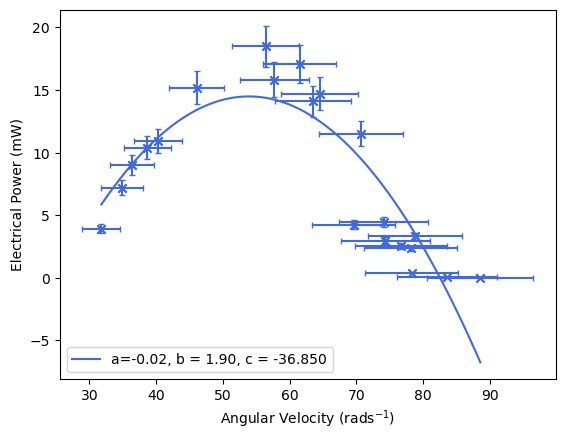

In [94]:
#Electrical Power vs Angular Velocity plot

x = elecpowerdf['Angular Velocity'] 
y = elecpowerdf['Power'] * 1000

param,covariance = sp.curve_fit(curve,x,y)
x_smooth = np.linspace(x.min(),x.max(),1000)
y_smooth = curve(x_smooth,*param)
plt.plot(
    x_smooth,
    y_smooth,
    label=rf'a={param[0]:.2f}, b = {param[1]:.2f}, c = {param[2]:.3f}',
    color='royalblue'
)

plt.scatter(
    x,
    y,
    color='royalblue',
    marker='x'
)

plt.errorbar(
    x,
    y,
    xerr=xerr2*x,
    yerr=yerr2*y,
    fmt='x',
    color='royalblue',
    ecolor='royalblue',
    capsize=2.0
)

plt.xlabel(r'Angular Velocity (rads$^{-1}$)')
plt.ylabel(r'Electrical Power (mW)')

plt.legend(loc='lower left')

plt.savefig("../Figures/elecpower.pgf")

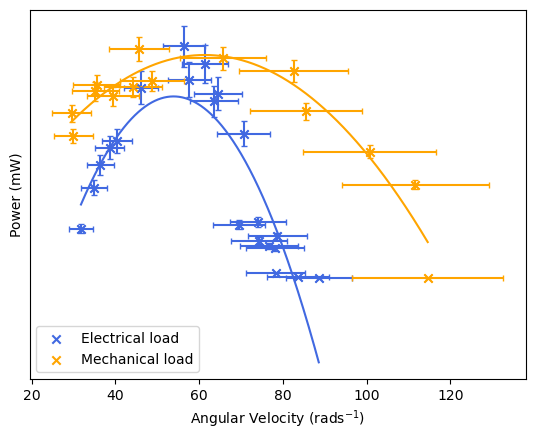

In [95]:
#Combined

#Electrical Power vs Angular Velocity plot

x1 = elecpowerdf['Angular Velocity'] 
y1 = elecpowerdf['Power'] * 1000 * 45

x2 = mechpowerdf['Angular Velocity'] 
y2 = mechpowerdf['Power']

param1,covariance1 = sp.curve_fit(curve,x1,y1)
x_smooth1 = np.linspace(x1.min(),x1.max(),1000)
y_smooth1 = curve(x_smooth1,*param1)
plt.plot(
    x_smooth1,
    y_smooth1,
    color='royalblue'
)

plt.scatter(
    x1,
    y1,
    color='royalblue',
    marker='x',
    label='Electrical load'
)

plt.errorbar(
    x1,
    y1,
    xerr=xerr2*x1,
    yerr=yerr2*y1,
    fmt='x',
    color='royalblue',
    ecolor='royalblue',
    capsize=2.0
)

param2,covariance2 = sp.curve_fit(curve,x2,y2)
x_smooth2 = np.linspace(x2.min(),x2.max(),1000)
y_smooth2 = curve(x_smooth2,*param2)
plt.plot(
    x_smooth2,
    y_smooth2,
    color='orange'
)

plt.scatter(
    x2,
    y2,
    color='orange',
    marker='x',
    label='Mechanical load'
)

plt.errorbar(
    x2,
    y2,
    xerr=xerr1*x2,
    yerr=yerr1*y2,
    fmt='x',
    color='orange',
    ecolor='orange',
    capsize=2.0
)

plt.yticks([])

plt.xlabel(r'Angular Velocity (rads$^{-1}$)')
plt.ylabel(r'Power (mW)')

plt.legend(loc='lower left')

plt.savefig("../Figures/combined.pgf")

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


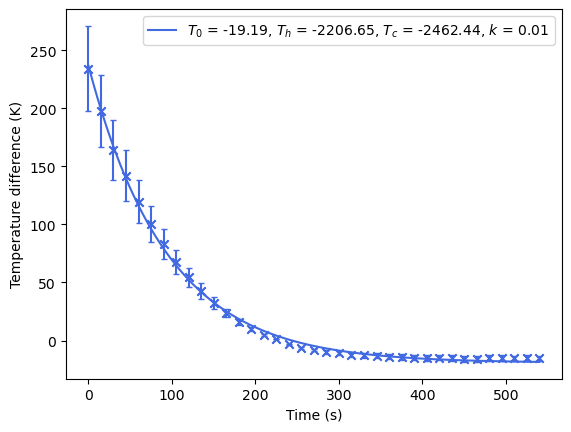

In [96]:
#Stirling Engine as a refrigerator

x = coolingdf['Time (s)'] 
y = coolingdf['Temp Diff']

param,covariance = sp.curve_fit(curve2,x,y)
x_smooth = np.linspace(x.min(),x.max(),1000)
y_smooth = curve2(x_smooth,*param)
plt.plot(
    x_smooth,
    y_smooth,
    color='royalblue',
    label = rf'$T_0$ = {param[0]:.2f}, $T_h$ = {param[1]:.2f}, $T_c$ = {param[2]:.2f}, $k$ = {param[3]:.2f}'
)

plt.scatter(
    x,
    y,
    color='royalblue',
    marker='x'
)

plt.errorbar(
    x,
    y,
    yerr=abs(xerr1*y),
    fmt='x',
    color='royalblue',
    ecolor='royalblue',
    capsize=2.0
)

plt.xlabel('Time (s)')
plt.ylabel('Temperature difference (K)')

plt.legend()

plt.savefig("../Figures/cooling.pgf")
plt.show()